In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [12]:
'''
training_inputs = np.array([[3, 1.5],
                           [2, 1],
                           [4, 1.5],
                           [3, 1],
                           [3.5, 5],
                           [2, 0.5],
                           [5.5, 1],
                           [1, 1],
                           [4.5, 1]])
training_outputs = np.array([[1, 0, 1, 0, 1, 0, 1, 0, 1]]).T 
'''

dataset = pd.read_csv('UTM_EnvironmentalDataSet_2018_4.csv')
X = dataset.iloc[:,12:14]
Y = dataset.iloc[:,15]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
training_inputs = X_train.values.tolist()
testing_inputs = X_test.values.tolist()
training_outputs = Y_train.values.tolist()
testing_outputs = Y_test.values.tolist()
final_weight = []


training_inputs = np.array(training_inputs)
training_outputs = np.array([training_outputs]).T
testing_inputs = np.array(testing_inputs)
testing_outputs = np.array([testing_outputs]).T

print(testing_outputs.shape)

(12, 1)


In [13]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def RMSE(z):
    loss = np.sum((z - training_outputs) ** 2)
    #print(loss)
    return np.sqrt(loss / 9)

def ANN(w):
    z1 = sigmoid(np.dot(training_inputs, w[0:2]))
    z2 = sigmoid(np.dot(training_inputs, w[2:4]))
    z3 = sigmoid(np.dot(training_inputs, w[4:6]))
    #print(np.array([z1, z2, z3]))
    z4 = sigmoid(np.dot(np.array([z1, z2, z3]).T, w[6:9]))
    
    #print(z4)
    output=np.resize(z4,(45,1))
    #print(output)
    return RMSE(output)

# Define Optimization Problem
problem = {
        'CostFunction': ANN,
        'nVar': 1,
        'VarMin': 0,   # Alternatively you can use a "numpy array" with nVar elements, instead of scalar
        'VarMax': 1,    # Alternatively you can use a "numpy array" with nVar elements, instead of scalar
    };

def PSO(problem, MaxIter = 100, PopSize = 100, c1 = 1.4962, c2 = 1.4962, w = 0.7298, wdamp = 1.0):

    best = 0
    R = np.zeros(MaxIter)
    I = np.zeros(MaxIter)
    # Empty Particle Template
    empty_particle = {
        'position': None,
        'velocity': None,
        'cost': None,
        'best_position': None,
        'best_cost': None,
    };

    # Extract Problem Info
    CostFunction = problem['CostFunction']
    VarMin = problem['VarMin']
    VarMax = problem['VarMax']
    nVar = problem['nVar']

    # Initialize Global Best
    gbest = {'position': None, 'cost': np.inf}

    # Create Initial Population
    pop = []
    for i in range(0, PopSize):
        pop.append(empty_particle.copy())
        pop[i]['position'] = np.random.rand(9, 1)
        pop[i]['velocity'] = np.zeros(nVar)
        pop[i]['cost'] = CostFunction(pop[i]['position'])
        pop[i]['best_position'] = pop[i]['position'].copy()
        pop[i]['best_cost'] = pop[i]['cost']
        
        if pop[i]['best_cost'] < gbest['cost']:
            gbest['position'] = pop[i]['best_position'].copy()
            gbest['cost'] = pop[i]['best_cost']
    
    # PSO Loop
    for it in range(0, MaxIter):
        for i in range(0, PopSize):
            
            pop[i]['velocity'] = w*pop[i]['velocity'] + c1*np.random.rand(nVar)*(pop[i]['best_position'] - pop[i]['position']) + c2*np.random.rand(nVar)*(gbest['position'] - pop[i]['position']);

            pop[i]['position'] += pop[i]['velocity']
            pop[i]['position'] = np.maximum(pop[i]['position'], VarMin)
            pop[i]['position'] = np.minimum(pop[i]['position'], VarMax)

            pop[i]['cost'] = CostFunction(pop[i]['position'])
            
            if pop[i]['cost'] < pop[i]['best_cost']:
                pop[i]['best_position'] = pop[i]['position'].copy()
                pop[i]['best_cost'] = pop[i]['cost']

                if pop[i]['best_cost'] < gbest['cost']:
                    gbest['position'] = pop[i]['best_position'].copy()
                    gbest['cost'] = pop[i]['best_cost']
                    best = i
                    #R[i] = gbest['cost']

        w *= wdamp
        print('Iteration {}: Best Cost = {}'.format(it, gbest['cost']))
        R[it] = gbest['cost']
        I[it] = it+1
    #print(R)  
    plt.figure(figsize=(15,8))
    plt.plot(I, R)
    plt.xlabel('No. of Iterations')
    plt.ylabel('RMSE')
    plt.show()
    print ('Best population:\n\n',pop[best]['position'])
    return gbest, pop;

Iteration 0: Best Cost = 0.10144974125151822
Iteration 1: Best Cost = 0.10144974125151822
Iteration 2: Best Cost = 0.10144974125151822
Iteration 3: Best Cost = 0.10144974125151822
Iteration 4: Best Cost = 0.10144974125151822
Iteration 5: Best Cost = 0.10144974125151822
Iteration 6: Best Cost = 0.10144974125151822
Iteration 7: Best Cost = 0.10144974125151822
Iteration 8: Best Cost = 0.10144974125151822
Iteration 9: Best Cost = 0.10144974125151822
Iteration 10: Best Cost = 0.10144974125151822
Iteration 11: Best Cost = 0.10144974125151822
Iteration 12: Best Cost = 0.10144974125151822
Iteration 13: Best Cost = 0.10144974125151822
Iteration 14: Best Cost = 0.10144974125151822
Iteration 15: Best Cost = 0.10144974125151822
Iteration 16: Best Cost = 0.10144974125151822
Iteration 17: Best Cost = 0.10144974125151822
Iteration 18: Best Cost = 0.10144974125151822
Iteration 19: Best Cost = 0.10144974125151822
Iteration 20: Best Cost = 0.10144974125151822
Iteration 21: Best Cost = 0.1014497412515182

Iteration 188: Best Cost = 0.10144974125151822
Iteration 189: Best Cost = 0.10144974125151822
Iteration 190: Best Cost = 0.10144974125151822
Iteration 191: Best Cost = 0.10144974125151822
Iteration 192: Best Cost = 0.10144974125151822
Iteration 193: Best Cost = 0.10144974125151822
Iteration 194: Best Cost = 0.10144974125151822
Iteration 195: Best Cost = 0.10144974125151822
Iteration 196: Best Cost = 0.10144974125151822
Iteration 197: Best Cost = 0.10144974125151822
Iteration 198: Best Cost = 0.10144974125151822
Iteration 199: Best Cost = 0.10144974125151822
Iteration 200: Best Cost = 0.10144974125151822
Iteration 201: Best Cost = 0.10144974125151822
Iteration 202: Best Cost = 0.10144974125151822
Iteration 203: Best Cost = 0.10144974125151822
Iteration 204: Best Cost = 0.10144974125151822
Iteration 205: Best Cost = 0.10144974125151822
Iteration 206: Best Cost = 0.10144974125151822
Iteration 207: Best Cost = 0.10144974125151822
Iteration 208: Best Cost = 0.10144974125151822
Iteration 209

Iteration 374: Best Cost = 0.10144974125151822
Iteration 375: Best Cost = 0.10144974125151822
Iteration 376: Best Cost = 0.10144974125151822
Iteration 377: Best Cost = 0.10144974125151822
Iteration 378: Best Cost = 0.10144974125151822
Iteration 379: Best Cost = 0.10144974125151822
Iteration 380: Best Cost = 0.10144974125151822
Iteration 381: Best Cost = 0.10144974125151822
Iteration 382: Best Cost = 0.10144974125151822
Iteration 383: Best Cost = 0.10144974125151822
Iteration 384: Best Cost = 0.10144974125151822
Iteration 385: Best Cost = 0.10144974125151822
Iteration 386: Best Cost = 0.10144974125151822
Iteration 387: Best Cost = 0.10144974125151822
Iteration 388: Best Cost = 0.10144974125151822
Iteration 389: Best Cost = 0.10144974125151822
Iteration 390: Best Cost = 0.10144974125151822
Iteration 391: Best Cost = 0.10144974125151822
Iteration 392: Best Cost = 0.10144974125151822
Iteration 393: Best Cost = 0.10144974125151822
Iteration 394: Best Cost = 0.10144974125151822
Iteration 395

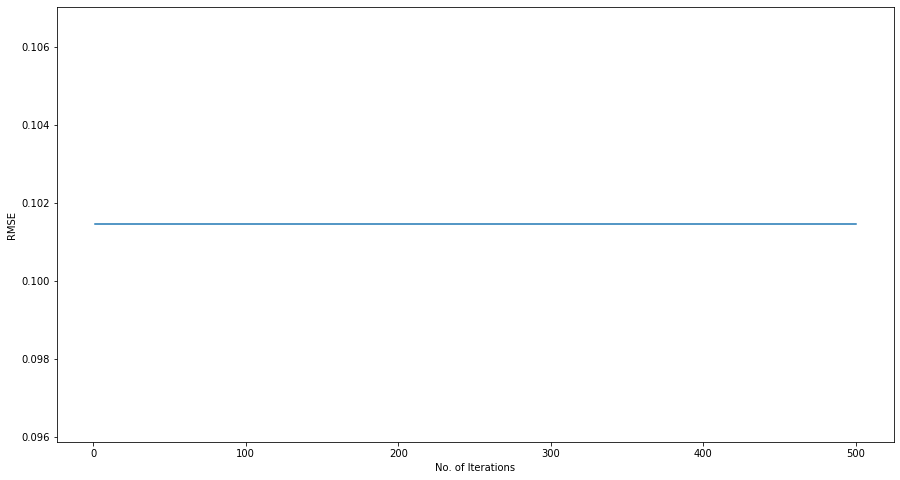

Best population:

 [[1.        ]
 [0.64965334]
 [0.35722428]
 [0.9424739 ]
 [1.        ]
 [0.35074416]
 [0.        ]
 [0.        ]
 [0.        ]]


In [14]:
if __name__ == '__main__':
    
    gbest, pop = PSO(problem, MaxIter = 500, PopSize = 50, c1 = 1.5, c2 = 2, w = 1, wdamp = 0.995)

In [18]:
weight = gbest['position']

z1 = sigmoid(np.dot(testing_inputs, weight[0:2]))
z2 = sigmoid(np.dot(testing_inputs, weight[2:4]))
z3 = sigmoid(np.dot(testing_inputs, weight[4:6]))
#print(np.array([z1, z2, z3]))
z4 = sigmoid(np.dot(np.array([z1, z2, z3]).T, weight[6:9]))

y_pred=np.resize(z4,(12,1))

explained_variance=metrics.explained_variance_score(testing_outputs, y_pred)
print(explained_variance)

-2.220446049250313e-16


In [22]:
max_error=metrics.max_error(testing_outputs, y_pred)
print(max_error)

0.04580000000000001


In [26]:
r2_score=metrics.r2_score(testing_outputs, y_pred)
print(r2_score)

-8422.327453769325


In [28]:
mean_squared_log_error=metrics.mean_squared_log_error(testing_outputs, y_pred)
print(mean_squared_log_error)

0.0009422440426689332


In [35]:
mean_absolute_error=metrics.mean_absolute_error(testing_outputs, y_pred)
print(mean_absolute_error)

0.04534166666666667
